![](https://i.imgur.com/JsMvGnP.png)

## Projeto - Classificação

## 1. Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [74]:
# bora importar tudo que vamos usar
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [75]:
# agora colocar os dados no nosso DataFrame
df = pd.read_csv('Churn_Modelling.csv')

In [76]:
# dar uma espiadinha nele ver se está tudo ok
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
# ver quantas entradas (ou clientes) temos
df.shape

(10000, 14)

In [78]:
# apenas no olho, parece haver pouca relação entre tempo no banco e qualquer outra coisa
df.groupby('Tenure').describe()

RowNumber                                                                    CustomerId                                                                                          CreditScore                                                                Age                                                     Balance                                                                           NumOfProducts                                              HasCrCard                                              IsActiveMember                                              EstimatedSalary                                                                                       Exited                                             
           count         mean          std   min      25%     50%      75%      max      count          mean           std         min          25%         50%         75%         max       count        mean        std    min    25%    50%     75%    max   count       mean        std   min   25%   50%   75%   max   count          mean           std  min  25%         50%          75%        max         count      mean       std  min  25%  50%  75%  max     count      mean       std  min  25%  50%  75%  max          count      mean       std  min  25%  50%  75%  max           count           mean           std     min         25%         50%          75%        max   count      mean       std  min  25%  50%  75%  max
Tenure                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
0          413.0  5032.324455  2787.893530  30.0  2623.00  5007.0  7431.00   9920.0      413.0  1.569345e+07  72102.679623  15566156.0  15630363.00  15694160.0  15757912.0  15815534.0       413.0  652.043584  96.408808  350.0  590.0  653.0  717.00  850.0   413.0  39.186441  10.299242  19.0  32.0  38.0  44.0  79.0   413.0  79878.910630  61838.266398  0.0  0.0   99948.450  129142.5400  197041.80         413.0  1.443099  0.525821  1.0  1.0  1.0  2.0  3.0     413.0  0.648910  0.477890  0.0  0.0  1.0  1.0  1.0          413.0  0.530266  0.499688  0.0  0.0  1.0  1.0  1.0           413.0  102374.579128  57420.108250  332.81  53020.9000  105105.350  155231.5500  199478.05   413.0  0.230024  0.421358  0.0  0.0  0.0  0.0  1.0
1         1035.0  5105.772947  2866.775249   2.0  2731.50  5150.0  7539.00   9987.0     1035.0  1.569172e+07  71870.004695  15565706.0  15629224.50  15693259.0  15753953.5  15815660.0      1035.0  648.806763  96.227373  350.0  578.0  652.0  717.00  850.0  1035.0  39.428986  10.759528  18.0  32.0  38.0  45.0  92.0  1035.0  78555.384222  61038.076556  0.0  0.0   99282.630  128136.1750  211774.31        1035.0  1.489855  0.579004  1.0  1.0  1.0  2.0  4.0    1035.0  0.677295  0.467737  0.0  0.0  1.0  1.0  1.0         1035.0  0.549758  0.497758  0.0  0.0  1.0  1.0  1.0          1035.0  100468.618957  58031.830963  236.45  52466.8050  101693.730  151017.6850  199661.50  1035.0  0.224155  0.417226  0.0  0.0  0.0  0.0  1.0
2         1048.0  5029.007634  2900.273481   1.0  2558.75  4972.5  7687.50   9995.0     1048.0  1.569515e+07  71975.907653  15566494.0  15635501.50  15696847.0  15756148.5  15815626.0      1048.0  652.832061  96.353984  399.0  588.0  654.0  717.25  850.0  1048.0  39.058206  10.205503  18.0  32.0  37.0  44.0  82.0  1048.0  76839.626469  63182.941945  0.0  0.0   97364.045  127916.3

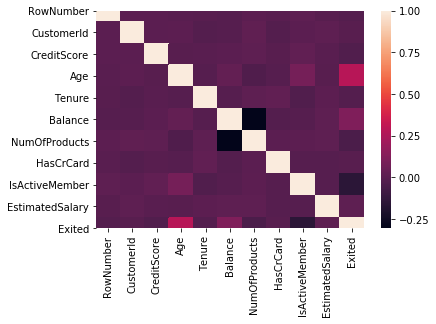

In [79]:
# caracoles, quase nenhuma correlação de nada com nada, isso dificulta o problema
correlacao = df.corr()
sns.heatmap(data=correlacao)

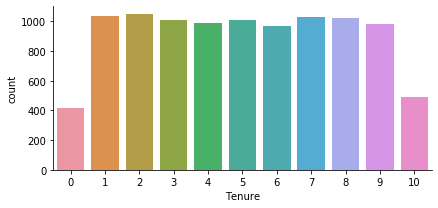

In [80]:
# uma distribuição bastante homogêna de anos no banco
ax = sns.catplot(x="Tenure", kind="count", data=df, height=3, aspect=2)

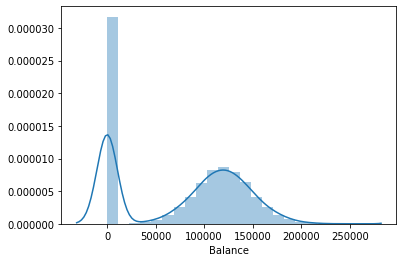

In [81]:
sns.distplot(a=df['Balance'])

### 3.2 Preparação e limpeza dos dados

In [82]:
# nenhum dado faltante em nenhuma feature, ótimo
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [83]:
# seu código

### 3.3 Seleção de atributos

In [84]:
df_train = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].copy()

In [85]:
categoricas = ['Geography', 'Gender']

In [86]:
le = preprocessing.LabelEncoder()
for x in categoricas:
    le.fit(df_train[x])
    df_train[x] = le.transform(df_train[x].astype(str))

In [87]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### 3.4 Construção do modelo

In [94]:
# criar uma matriz X e o vetor y
X = np.array(df_train.iloc[:, 0:9]) # features
y = np.array(df_train['Exited']) # classes

In [95]:
# criação de intervalo de números ímpares de K para KNN
neighbors = list(range(1,50,2))


# criação de intervalo de f para k-fold
cv_list = list(range(10,40))


# criação da estrutura de listas para armazenar valores
k_list = []
fold_list = []
cv_scores = []

In [96]:
# importar bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

# executar KNN e k-fold cross validation
for k in neighbors:
  for f in cv_list:
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = cross_val_score(knn, X, y, cv=f, scoring='accuracy')
      cv_scores.append(scores.mean())  #popular listas
      k_list.append(k)                 
      fold_list.append(f)

### 3.5 Avaliação do modelo

In [97]:
# calcular o erro 
MSE = [1 - x for x in cv_scores]

# contrução do dataframe
df_1 = pd.DataFrame (k_list, columns=['k_list'])
df_2 = pd.DataFrame (fold_list, columns=['fold_list'])
df_3 = pd.DataFrame (MSE, columns=['MSE'])
df_knn = pd.concat([df_1, df_2, df_3], axis=1)

# retorna o menor erro obtido
optimal_k = min(df_knn['MSE'])

# retorna os valores de k e f do menor erro obtido
index_opt = df_knn[df_knn['MSE'] == optimal_k].index.item()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  


The optimal number of neighbors k is 47
The optimal number of folds f is 10
Misclassification Error of 0.203500


Text(0.5, 0, 'MSE')

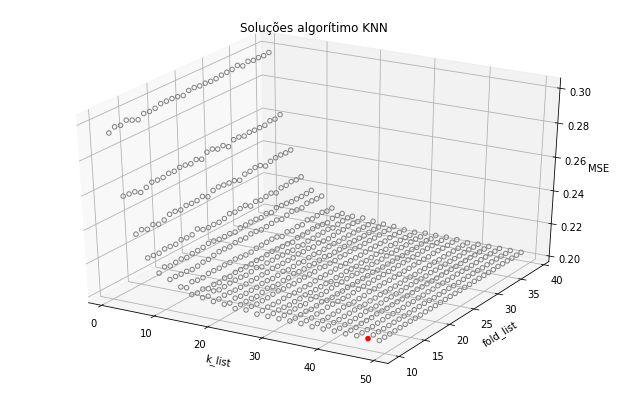

In [98]:
# importar bibliotecas
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# printar os resultados
print ("The optimal number of neighbors k is %d" % df_knn.loc[index_opt, 'k_list'] )
print ("The optimal number of folds f is %d" % df_knn.loc[index_opt, 'fold_list'] )
print ("Misclassification Error of %f" % optimal_k )

# plotar misclassification error vs k vs f (k-fold)
plt.rcParams['figure.figsize'] = (11,7)
fig = plt.figure()
ax = plt.axes(projection='3d')
color= ['red' if l == index_opt else 'grey' for l in df_knn.index.tolist()]
fc= ['red' if l == index_opt else 'none' for l in df_knn.index.tolist()]
ax.scatter3D(k_list, fold_list, MSE, s=20, facecolor = fc, edgecolors=color, 
depthshade=False)

# nomear o gráfico e os eixos
ax.set_title('Soluções algorítimo KNN')
ax.set_xlabel('k_list')
ax.set_ylabel('fold_list')
ax.set_zlabel('MSE')

### 3.4 Otimização do modelo

In [92]:
# seu código

In [93]:
# seu código

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.